In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np

# Set the path to the file you'd like to load
file_path = "data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/breast-cancer-wisconsin-data",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:\n", df.head())

/tmp/ipython-input-88003626.py:12: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.
First 5 records:
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280   

checking the balancing of dataset

percentage for Malignant Tumor 37.258347978910365 
Benign Tumor is 62.741652021089635


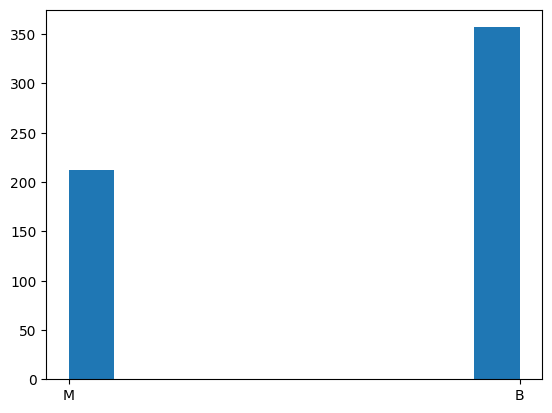

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['diagnosis'])
print(f"percentage for Malignant Tumor {(len(df[df['diagnosis']=='M'])/len(df['diagnosis'])*100)} \nBenign Tumor is {(len(df[df['diagnosis']=='B'])/len(df['diagnosis'])*100)}")

In [ ]:
null_val=df.isnull().mean()*100
null_val=null_val[null_val>0].sort_values(ascending=False)
print("--- Null Percentage for All Columns ---")
print(null_val)
# lol only 1 col which is whole null so i will remove it


--- Null Percentage for All Columns ---
Unnamed: 32    100.0
dtype: float64


removing the col with no values we dont need ID also

In [ ]:
print(f"before deletion = {len(df.columns)} columns")
df=df.drop(['Unnamed: 32', 'id'], axis = 1)
print(f"after deletion = {len(df.columns)} columns")

before deletion = 33 columns
after deletion = 31 columns


now lets see if the dataset is having numerical or categorical yes then how much so we can sort on the bases of that since 1 and 0 are also considered numericals val.

In [ ]:
unique_val=df.nunique()/len(df)*100
unique_val=unique_val.sort_values(ascending=False)
print(unique_val)

smoothness_se              96.133568
fractal_dimension_se       95.782074
area_worst                 95.606327
concave points_mean        95.254833
compactness_se             95.079086
radius_se                  94.903339
area_mean                  94.727592
concavity_worst            94.727592
compactness_mean           94.376098
concavity_mean             94.376098
fractal_dimension_worst    94.024605
perimeter_se               93.673111
concavity_se               93.673111
compactness_worst          92.970123
area_se                    92.794376
perimeter_mean             91.739895
texture_se                 91.212654
perimeter_worst            90.333919
texture_worst              89.806678
concave points_se          89.103691
symmetry_worst             87.873462
fractal_dimension_mean     87.697715
symmetry_se                87.521968
concave points_worst       86.467487
texture_mean               84.182777
smoothness_mean            83.304042
radius_worst               80.316344
r

from the sorting we can see one category *(that was given since we should have diagnosis)*and other are numericals

In [ ]:
# df['diagnosis'] = df['diagnosis'].map({'M' : 1 , 'B':0})
print(df['diagnosis'])


0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


to get the lm plots i cant just find whole correlation matrix since there are 2 category for EX




*   if Col_X has 0.01 corr with Maliganant and .899 with Benign so i will find correlation seprately for both M and B







these are top 10 reletion

	 Pairs with the BIGGEST Correlation Difference (M vs. B) 
area_mean       radius_se          0.695254
radius_mean     radius_se          0.667031
perimeter_mean  radius_se          0.664729
area_mean       perimeter_se       0.655533
radius_se       perimeter_worst    0.647343
                area_worst         0.642025
                radius_worst       0.626659
radius_mean     perimeter_se       0.623936
perimeter_mean  perimeter_se       0.619833
                smoothness_se      0.598209
dtype: float64


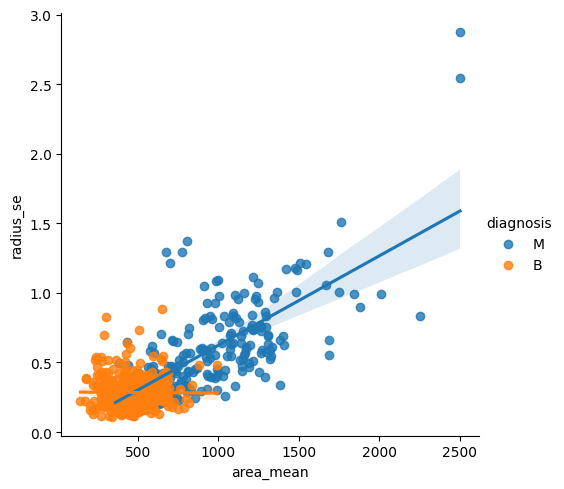

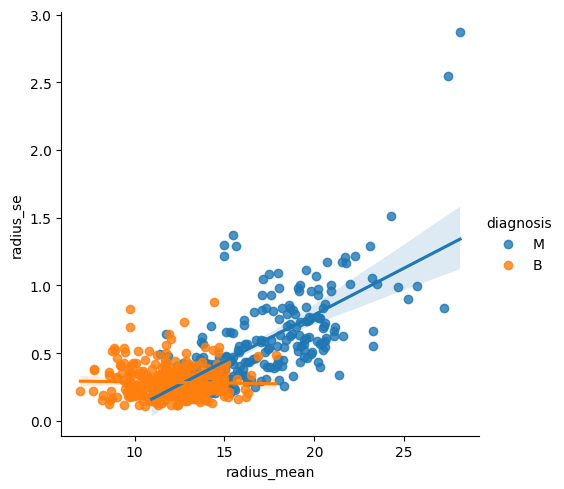

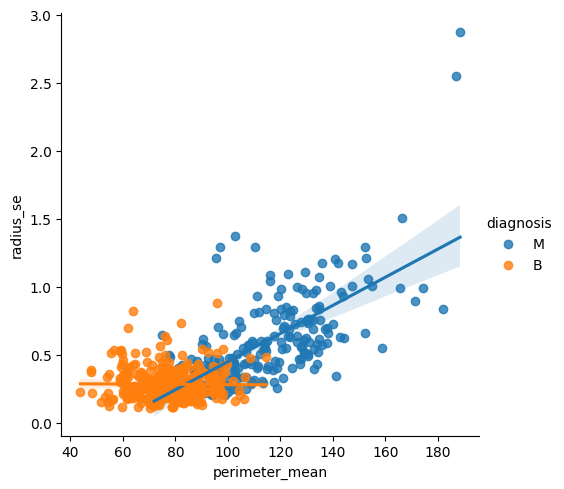

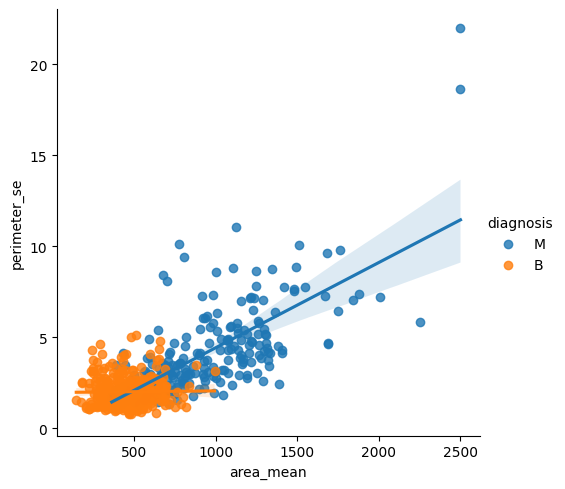

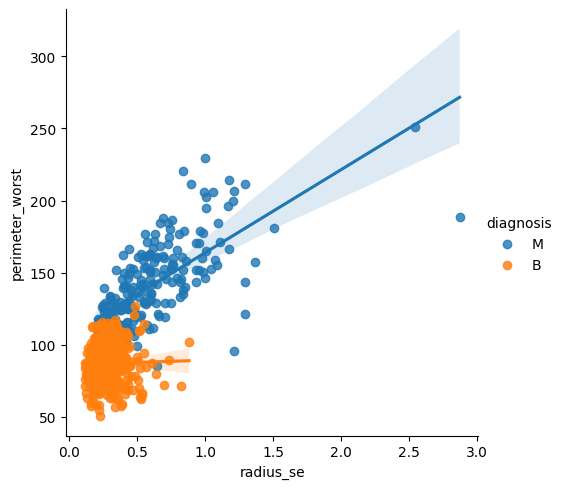

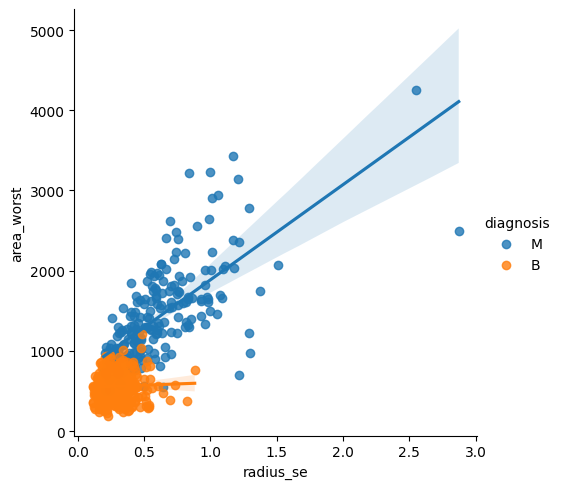

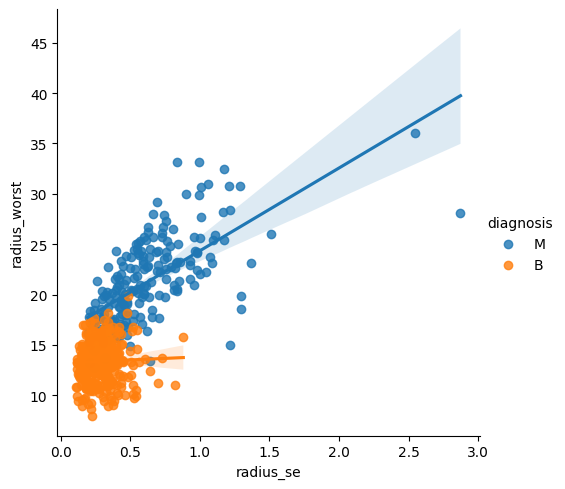

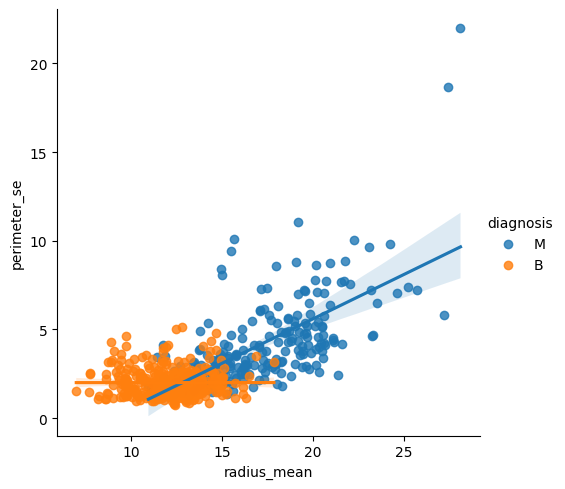

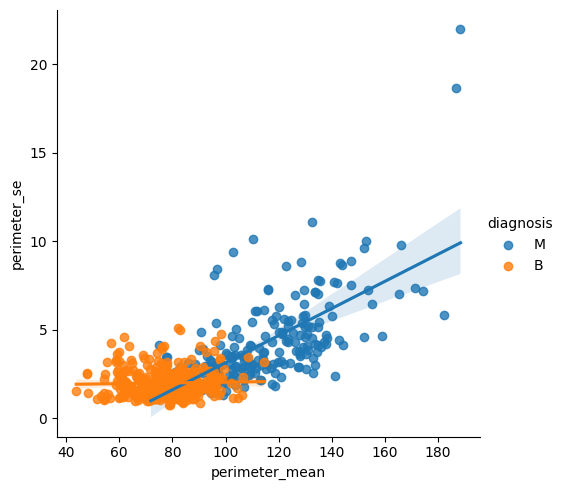

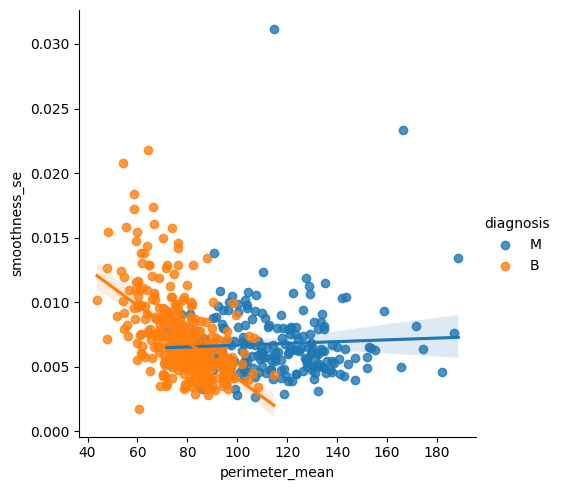

In [ ]:
import seaborn as sns
m_corr=df[df['diagnosis']=='M'].corr(numeric_only=True)

b_corr=df[df['diagnosis']=='B'].corr(numeric_only=True)
diff_corr=m_corr-b_corr

#  to avoid x,y and y,x repating
upper_triangle = diff_corr.where(np.triu(np.ones(diff_corr.shape), k=1).astype(bool))
# print(np.triu(np.ones(diff_corr.shape)),upper_triangle)
# here since i did M corr - B morr the +ve is Toward M corr and -ve towards B corr
sorted_diffs = upper_triangle.stack().sort_values(key=abs, ascending=False)

print("\t Pairs with the BIGGEST Correlation Difference (M vs. B) ")
print(sorted_diffs.head(10))
for pairs in sorted_diffs.head(10).index:
    sns.lmplot(x =pairs[0], y = pairs[1],
           data = df, hue = 'diagnosis')

lets see M and B top corr in bar plot

/tmp/ipython-input-3041835822.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.values, y=y_labels, palette='coolwarm')


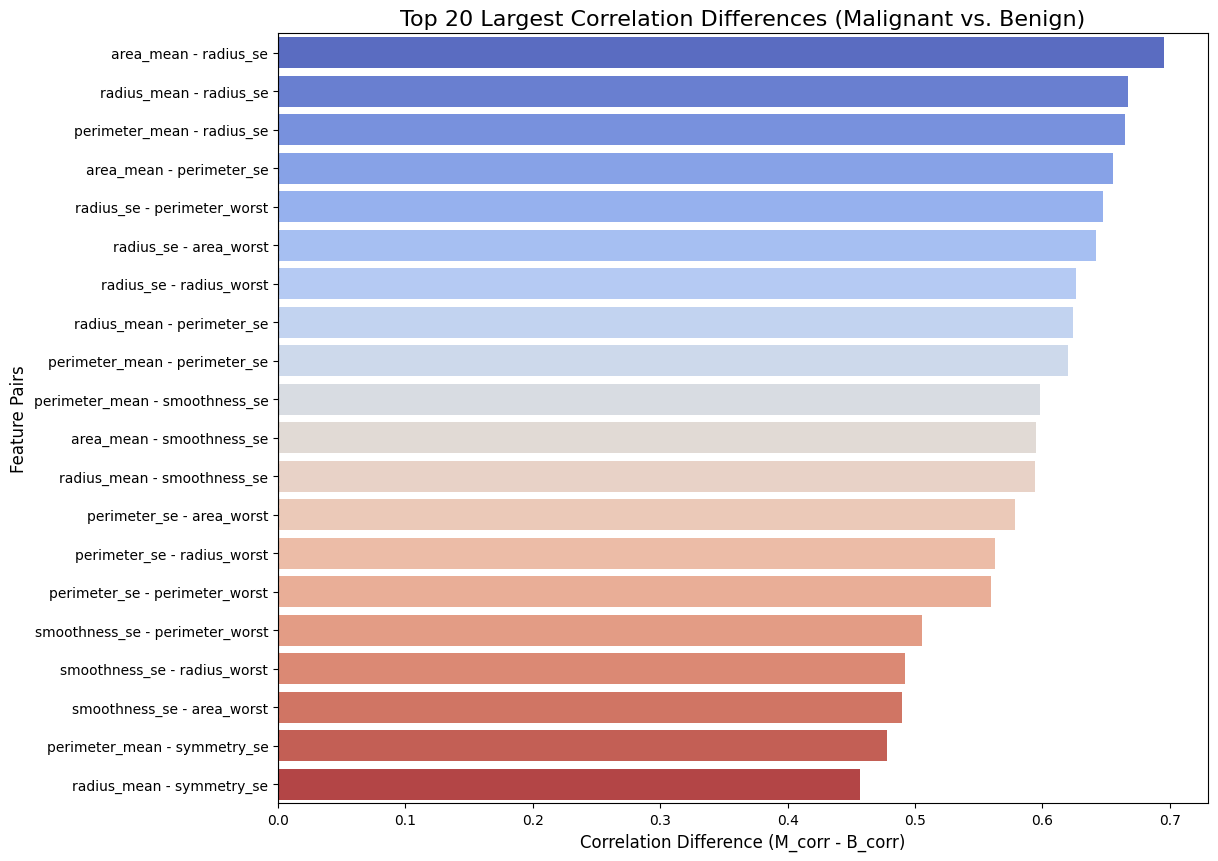

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get the top 20 most significant differences
plot_data = sorted_diffs.head(20)

y_labels = [f"{idx[0]} - {idx[1]}" for idx in plot_data.index]

# 2. Create the bar plot
plt.figure(figsize=(12, 10))

# Use the new 'y_labels' list for the y-axis and x are only corr
sns.barplot(x=plot_data.values, y=y_labels, palette='coolwarm')

# 3. Add labels and title
plt.title('Top 20 Largest Correlation Differences (Malignant vs. Benign)', fontsize=16)
plt.xlabel('Correlation Difference (M_corr - B_corr)', fontsize=12)
plt.ylabel('Feature Pairs', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--') # Add a line at zero for clarity
plt.show()

In [ ]:
Y=df['diagnosis']
# removing the top correlation for avoiding overfitting
X=df.drop(['diagnosis',"area_mean","radius_se","perimeter_worst"],axis=1)
print(X,"\n",Y)

     radius_mean  texture_mean  perimeter_mean  smoothness_mean  \
0          17.99         10.38          122.80          0.11840   
1          20.57         17.77          132.90          0.08474   
2          19.69         21.25          130.00          0.10960   
3          11.42         20.38           77.58          0.14250   
4          20.29         14.34          135.10          0.10030   
..           ...           ...             ...              ...   
564        21.56         22.39          142.00          0.11100   
565        20.13         28.25          131.20          0.09780   
566        16.60         28.08          108.30          0.08455   
567        20.60         29.33          140.10          0.11780   
568         7.76         24.54           47.92          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690    

scalling the data set

In [ ]:
X=((X-X.min())/(X.max()-X.min()))
print("---After scalling---")
print(X)

---After scalling---
     radius_mean  texture_mean  perimeter_mean  smoothness_mean  \
0       0.521037      0.022658        0.545989         0.593753   
1       0.643144      0.272574        0.615783         0.289880   
2       0.601496      0.390260        0.595743         0.514309   
3       0.210090      0.360839        0.233501         0.811321   
4       0.629893      0.156578        0.630986         0.430351   
..           ...           ...             ...              ...   
564     0.690000      0.428813        0.678668         0.526948   
565     0.622320      0.626987        0.604036         0.407782   
566     0.455251      0.621238        0.445788         0.288165   
567     0.644564      0.663510        0.665538         0.588336   
568     0.036869      0.501522        0.028540         0.000000   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.792037        0.703140             0.731113       0.686364   
1            0.18176

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=7)

In [ ]:
for _ in range(int(input())):
    n=int(input())
    s=input()
    l=s.split(s[-1])
    i=0
    for n in l:
        i+=len(n)
    print(i)

4
0
4


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# --- 1. Initialization ---
# We'll start with k=5 neighbors. This is a common starting point.
knn = KNeighborsClassifier(n_neighbors=10)

# --- 2. Training (Fitting) ---
# 'fit' means "train the model on the training data"
knn.fit(x_train, y_train)

# --- 3. Prediction ---
# Now, use the trained model to predict the classes for the unseen test data
y_pred_knn = knn.predict(x_test)

# --- 4. Check Accuracy ---
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")

KNN Accuracy: 95.32%


Confusion Matrix:
[[67  7]
 [ 0 97]]


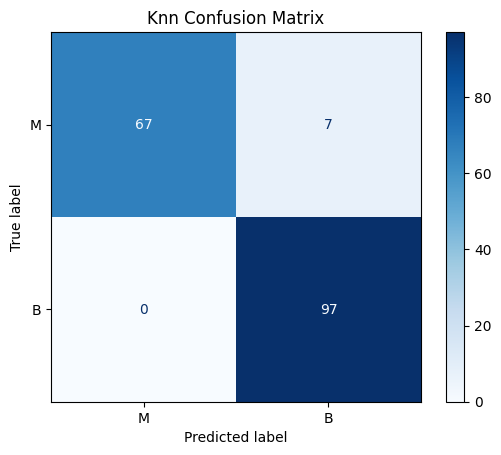

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# We already have y_pred_log from the Logistic Regression
# and y_test from the split

# 1. Generate the matrix numbers
# We specify the labels to ensure 'M' is treated as the "positive" class
labels = ['M', 'B']
cm = confusion_matrix(y_test, y_pred_knn, labels=labels)

print("Confusion Matrix:")
print(cm)

# 2. Plot it nicely
# The 'display_labels' are what show up on the plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.title("Knn Confusion Matrix")
plt.show()